In [1]:
mars_data <- read.csv(file = 'phase1-multicoll-featureless.csv')
head(mars_data)

HistMean,HistVar,LaplVar,MaxLapl,MaxVar,MaxAvgLapl,IQR,Deviation,C1AreaProp,C4AreaProp,...,SurfNumKP,AkazeNumKP,KazeNumKP,ORBNumKP,RidgeAreaProp,AvgMaxX,MaxY,MinVar,Filename,Output
95.84094,3587.825,148.4466,15.636719,50.88257,49.24107,100,0.7377586,0.2994385,0.3647461,...,0,0,0,0,0.5721944,110625,116922,632.04469,ESP_011264_1090_RED.NOMAP.browse-Block-4.jpg,1
110.63977,1704.534,2243.9788,9.453964,18.10980,40.48936,60,0.3181755,0.2775269,0.3638916,...,146,6,22,181,0.6182844,58605,84729,184.92611,ESP_011422_0930_RED.NOMAP.browse-Block-6.jpg,1
129.40570,1055.437,1550.5920,18.949448,38.63184,47.66981,48,2.0493921,0.2548828,0.3530273,...,89,0,7,94,0.6007352,59713,54258,164.22636,ESP_011432_0925_RED.NOMAP.browse-Block-10.jpg,1
135.89941,1111.217,1029.8451,24.823227,102.55371,33.93791,37,1.0000000,0.1818848,0.3504639,...,33,0,1,50,0.5522676,51854,53703,128.28643,ESP_011432_0925_RED.NOMAP.browse-Block-11.jpg,1
103.96356,1637.559,891.5564,24.825668,38.75096,30.78677,56,1.8713450,0.1924438,0.3425903,...,72,0,0,27,0.4916845,40802,52803,74.71501,ESP_011432_0925_RED.NOMAP.browse-Block-6.jpg,1
140.25903,1698.280,1155.7717,27.713806,70.32715,47.28924,43,384.0000000,0.2556152,0.3627319,...,21,0,1,30,0.6014662,59880,59313,169.58131,ESP_011432_0925_RED.NOMAP.browse-Block-7.jpg,1


In [2]:
colnames(mars_data)

[1] "HistMean"      "HistVar"       "LaplVar"       "MaxLapl"      
 [5] "MaxVar"        "MaxAvgLapl"    "IQR"           "Deviation"    
 [9] "C1AreaProp"    "C4AreaProp"    "SiftNumKP"     "SurfNumKP"    
[13] "AkazeNumKP"    "KazeNumKP"     "ORBNumKP"      "RidgeAreaProp"
[17] "AvgMaxX"       "MaxY"          "MinVar"        "Filename"     
[21] "Output"

In [3]:
model <- glm(Output~HistMean+LaplVar+MaxVar+MaxAvgLapl+IQR+Deviation+C1AreaProp+C4AreaProp+SiftNumKP+SurfNumKP+AkazeNumKP+KazeNumKP+ORBNumKP+RidgeAreaProp+AvgMaxX+MaxY+MinVar, family=binomial, data=mars_data)
summary(model)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Output ~ HistMean + LaplVar + MaxVar + MaxAvgLapl + 
    IQR + Deviation + C1AreaProp + C4AreaProp + SiftNumKP + SurfNumKP + 
    AkazeNumKP + KazeNumKP + ORBNumKP + RidgeAreaProp + AvgMaxX + 
    MaxY + MinVar, family = binomial, data = mars_data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.28351  -0.01575   0.00000   0.00000   2.56462  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    2.498e+00  2.036e+00   1.227   0.2198    
HistMean      -1.876e-03  6.978e-03  -0.269   0.7880    
LaplVar       -4.995e-04  3.546e-04  -1.409   0.1589    
MaxVar        -2.945e-02  4.973e-03  -5.922 3.17e-09 ***
MaxAvgLapl     5.907e-03  3.818e-03   1.547   0.1219    
IQR           -1.514e-02  9.669e-03  -1.566   0.1173    
Deviation      2.050e-05  5.540e-05   0.370   0.7114    
C1AreaProp    -1.951e+00  5.294e+00  -0.368   0.7125    
C4AreaProp    -7.414e+00  7.920e+00  -0.936   0.3492    
SiftNumKP     -5.440e

In [4]:
dffits = data.frame(influence.measures(model)[1])$infmat.dffit
dffits_threshold = 2*(20*length(dffits)^(1/2))
hat_diag =  data.frame(influence.measures(model)[1])$infmat.hat
hat_diag_threshold = 2*(20/length(hat_diag))

In [5]:
res = residuals(model)

In [6]:
print("Diagonising by dffits")
for(i in 1:length(dffits))
{
        if (abs(dffits[i]) > dffits_threshold)
            print(i)
}
print("Diagnosing by hat matrix")
for(i in 1:length(hat_diag))
{
        if (abs(hat_diag[i]) > hat_diag_threshold)
            {
                if (abs(res[i]) > 2)
                    {
                        print(i)
                    }
            }
}

[1] "Diagonising by dffits"
[1] "Diagnosing by hat matrix"
[1] 20
[1] 35
[1] 44
[1] 56
[1] 723


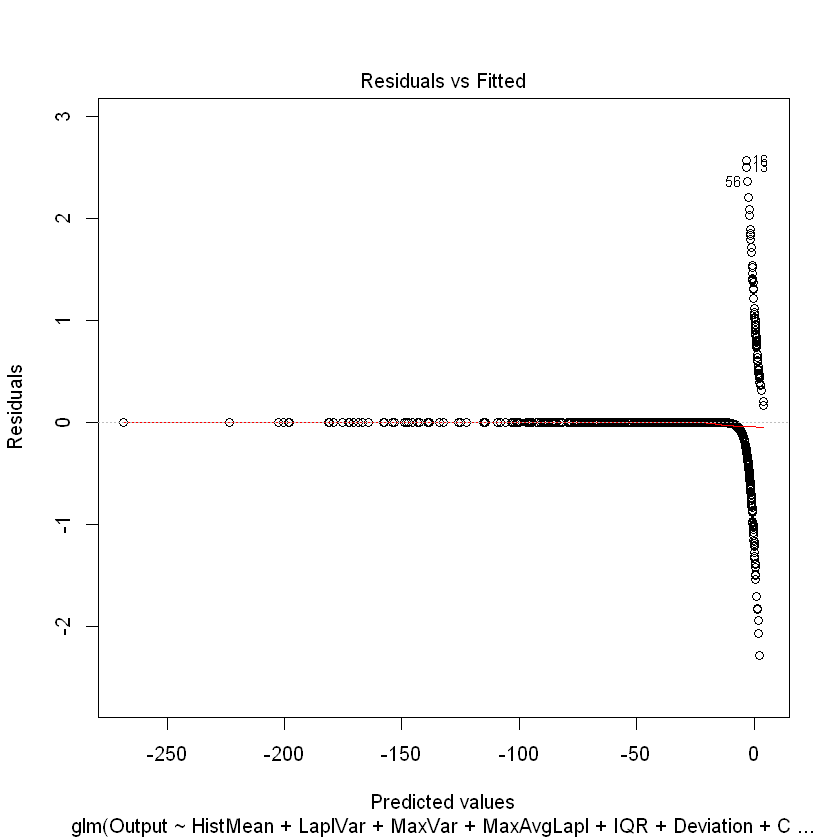

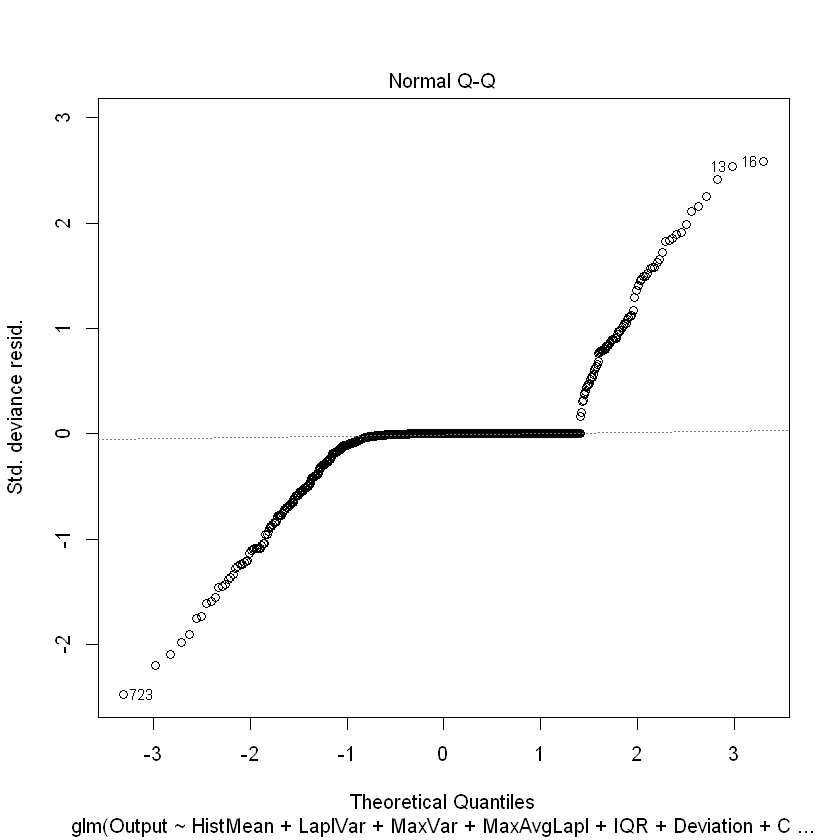

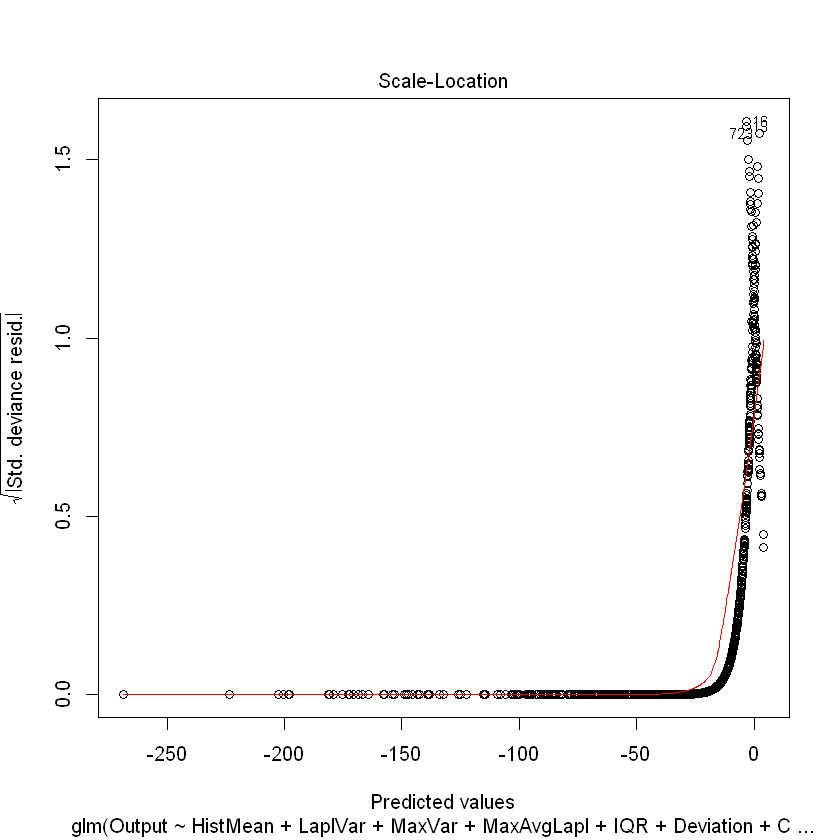

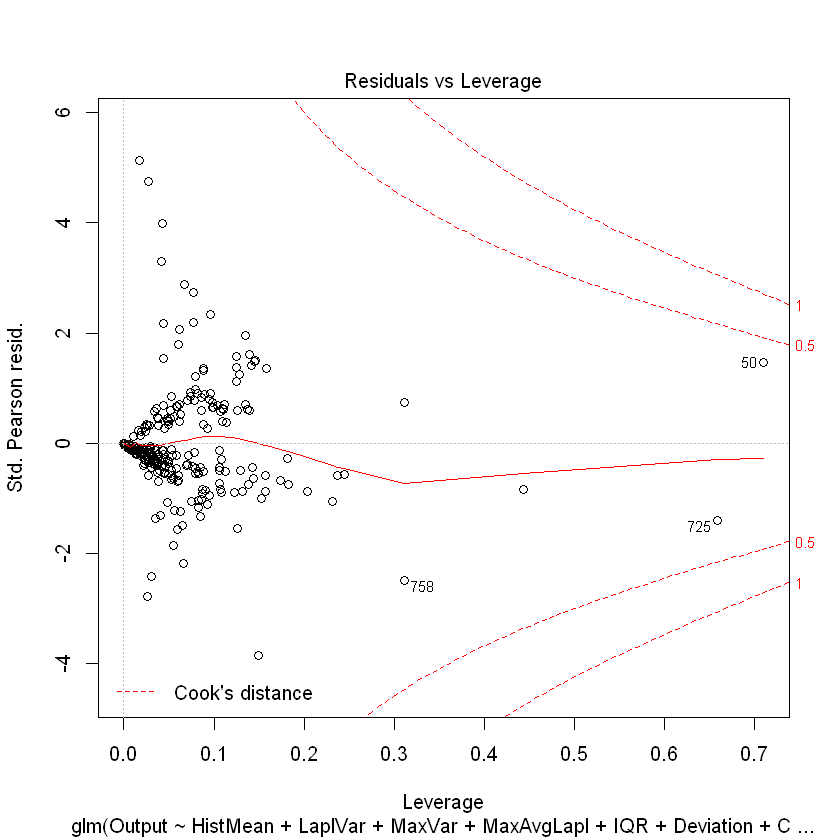

In [7]:
plot(model)